# 0 - Importing Dependicies and Setting up GPU

In [75]:
!nvidia-smi

Thu Mar  9 07:18:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    36W /  70W |    573MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [76]:
import torch
torch.cuda.is_available()

True

In [77]:
# Device Achostic Code
device="cuda" if torch.cuda.is_available() else "cpu"

In [78]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

In [79]:
from torch import nn
import matplotlib.pyplot as plt

# 1 - Data Preparing And Loading

## Creating Data

In [80]:
# Regression Data
weight=0.5
bias=0.2

start=0
end=2
step=0.02
X=torch.arange(start,end,step)

In [81]:
X

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800, 1.0000, 1.0200, 1.0400, 1.0600,
        1.0800, 1.1000, 1.1200, 1.1400, 1.1600, 1.1800, 1.2000, 1.2200, 1.2400,
        1.2600, 1.2800, 1.3000, 1.3200, 1.3400, 1.3600, 1.3800, 1.4000, 1.4200,
        1.4400, 1.4600, 1.4800, 1.5000, 1.5200, 1.5400, 1.5600, 1.5800, 1.6000,
        1.6200, 1.6400, 1.6600, 1.6800, 1.7000, 1.7200, 1.7400, 1.7600, 1.7800,
        1.8000, 1.8200, 1.8400, 1.8600, 1.8800, 1.9000, 1.9200, 1.9400, 1.9600,
        1.9800])

In [82]:
y=weight*X+bias

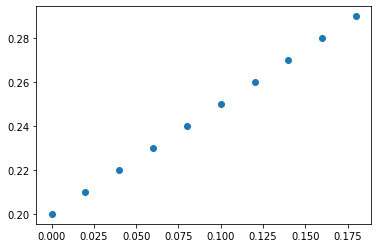

In [83]:
plt.scatter(X[:10],y[:10])

## Creating Train Test Split


In [84]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

In [85]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

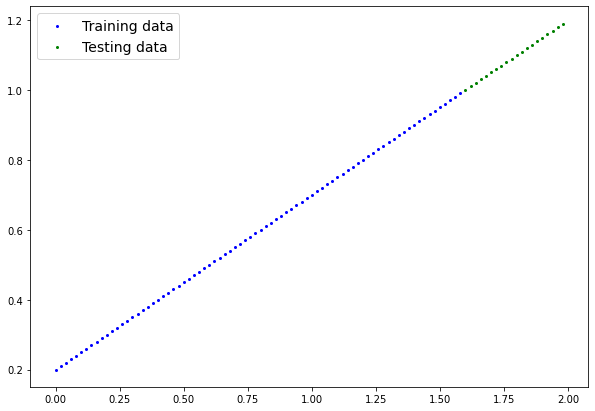

In [86]:
plot_predictions()

# 2 - Creating the Model
 

## A Simple Linear Regression Model

In [87]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    #initializing Weights
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    #Forward Pass
  def forward(self,x:torch.tensor)->torch.tensor:
    return x*self.weights+self.bias

In [88]:
linModel=LinearRegression()

In [89]:
predictions=linModel.forward(X_test)

In [90]:
predictions.data

tensor([0.2750, 0.2903, 0.3055, 0.3207, 0.3359, 0.3511, 0.3663, 0.3815, 0.3967,
        0.4120, 0.4272, 0.4424, 0.4576, 0.4728, 0.4880, 0.5032, 0.5185, 0.5337,
        0.5489, 0.5641])

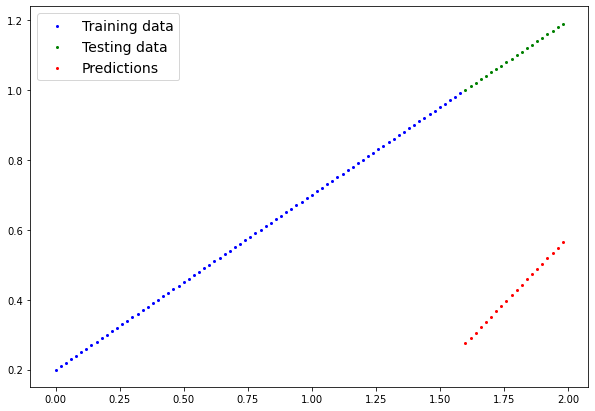

In [91]:
plot_predictions(predictions=predictions.data)

## Contents of a PyTorch Model

In [92]:
# torch.manual_seed(42)

In [93]:
list(linModel.parameters())

[Parameter containing:
 tensor([0.7607], requires_grad=True), Parameter containing:
 tensor([-0.9420], requires_grad=True)]

In [94]:
linModel.state_dict()

OrderedDict([('weights', tensor([0.7607])), ('bias', tensor([-0.9420]))])

## Making Predictions


In [95]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = linModel(X_test)

In [96]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 20
Number of predictions made: 20
Predicted values:
tensor([0.2750, 0.2903, 0.3055, 0.3207, 0.3359, 0.3511, 0.3663, 0.3815, 0.3967,
        0.4120, 0.4272, 0.4424, 0.4576, 0.4728, 0.4880, 0.5032, 0.5185, 0.5337,
        0.5489, 0.5641])


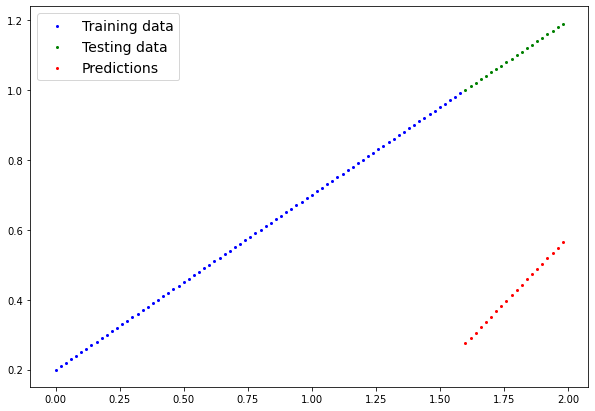

In [97]:
plot_predictions(predictions=y_preds)

In [98]:
y_test - y_preds

tensor([0.7250, 0.7197, 0.7145, 0.7093, 0.7041, 0.6989, 0.6937, 0.6885, 0.6833,
        0.6780, 0.6728, 0.6676, 0.6624, 0.6572, 0.6520, 0.6468, 0.6415, 0.6363,
        0.6311, 0.6259])

## Train Model

In [99]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

In [100]:
optimizer = torch.optim.SGD(params=linModel.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [107]:
epochs=50

In [108]:
# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

In [109]:
for epoch in range(epochs):
  linModel.train()
  # Forward Pass
  y_pred=linModel(X_train)
  # Calculate The Loss
  loss=loss_fn(y_pred,y_train)
   # Zero grad of the optimizer
  optimizer.zero_grad()
  # BackWard Pass
  loss.backward()
  # Step Gradient
  optimizer.step()
  # Evaluating The Model
  linModel.eval()
  with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = linModel(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.773700475692749 | MAE Test Loss: 0.4098796844482422 
Epoch: 10 | MAE Train Loss: 0.6112905144691467 | MAE Test Loss: 0.16846977174282074 
Epoch: 20 | MAE Train Loss: 0.4488806128501892 | MAE Test Loss: 0.07684272527694702 


In [110]:
linModel.weights

Parameter containing:
tensor([1.0589], requires_grad=True)

In [111]:
with torch.inference_mode(): 
    y_pred_new = linModel(X_test)

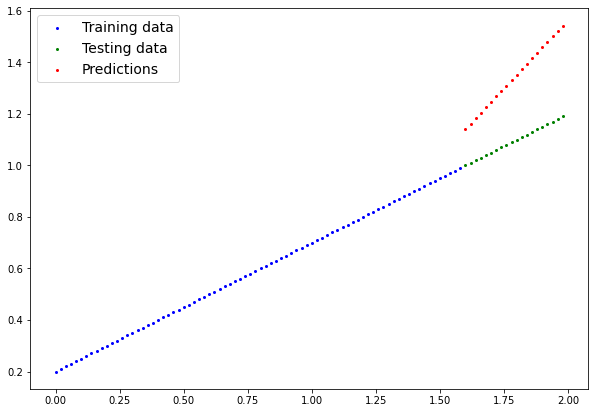

In [112]:
plot_predictions(predictions=y_pred_new)

# 3 - Evaluating The Model


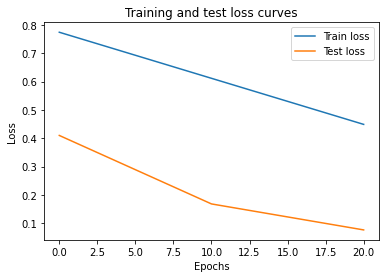

In [113]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [115]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(linModel.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([1.0589])), ('bias', tensor([-0.5538]))])

And the original values for weights and bias are:
weights: 0.5, bias: 0.2


In [116]:
# 1. Set the model in evaluation mode
linModel.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = linModel(X_test)
y_preds

tensor([1.1405, 1.1617, 1.1829, 1.2041, 1.2252, 1.2464, 1.2676, 1.2888, 1.3099,
        1.3311, 1.3523, 1.3735, 1.3947, 1.4158, 1.4370, 1.4582, 1.4794, 1.5006,
        1.5217, 1.5429])

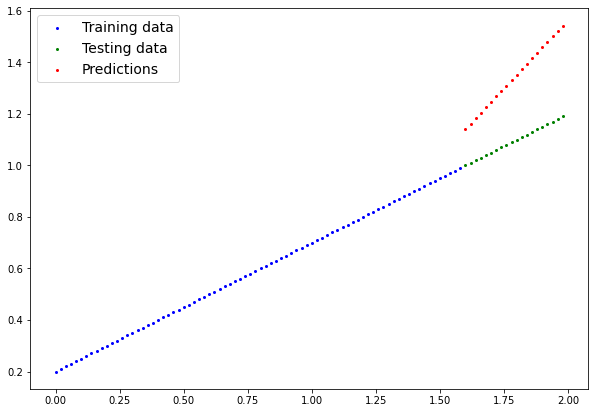

In [117]:
plot_predictions(predictions=y_preds)

# Saving and Loading The Model


In [118]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=linModel.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_0.pth


In [120]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegression()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>